# Numerical Investigations to Burger's Equation

In [1]:
import numpy as np
import matplotlib as plt

In [93]:
import crank_nicholson as cn
import finite_difference as fd
import analytic_sol

Burger's equation is a non-linear PDE that allows one to develop intuition regarding the physical mechanisms of both advection and diffusion. The equation in one dimension is given by

\\[\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.\\]

This can be thought of as a simplified Navier-Stokes equation with no body force terms or pressure gradient. $\nu$ represents the kinematic viscosity and thus the term $\nu (\partial^2 u/\partial x^2)$ represents the diffusion of viscous forces. The term $u (\partial u / \partial x)$ is the advection term, as seen in the Navier-Stokes equation. Often it is of interest to solve the problem when $\nu = 0$ - this is referred to as the inviscid Burger's equation, and is often expressed as

\\[\frac{\partial u}{\partial t} + \frac{1}{2}\frac{\partial}{\partial x}u^2=0.\\]

To develop intuition regarding the role of each type of transport, the viscid Burger's equation is first considered. The explicit finite difference method will be derived and implemented, though as with most explicit methods, the stability varies due to the accumulation of error with each step. 

### Explicit Finite Difference Method

The explicit method is obtained by using a forward-difference on the time derivative, meaning

\\[\frac{\partial u}{\partial t} \approx \frac{u(x,t+\Delta t) - u(x,t)}{\Delta t} = \frac{u_{i,j+1} - u_{i,j}}{\Delta t}.\\]

As seen in Landau, Paez and Bordeianu, the central-difference approximation is used on the diffusion term, resulting in

\\[\frac{\partial^2 u}{\partial x^2} \approx \frac{u(x+\Delta x,t) - 2u(x,t) + u(x-\Delta x,t)}{(\Delta x)^2} 
= \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2}.\\]


There are a couple of different first order approaches to approximate the advection term. The first method uses a central-difference to approximate $\partial u / \partial x$. 

\\[\frac{\partial u}{\partial x} \approx \frac{u(x+\Delta x/2,t) - u(x-\Delta x / 2,t)}{\Delta x} = \frac{(u_{i+1,j}+u_{i,j})/2 - (u_{i-1,j}+u_{i,j})/2}{\Delta x} = \frac{u_{i+1,j} -u_{i-1,j}}{2\Delta x}\\]

Using this approximation, an explicit finite difference method for Burger's equation is given by 

\\[\begin{align} \frac{u_{i,j+1} - u_{i,j}}{\Delta t} + \frac{u_{i,j}(u_{i+1,j} -u_{i-1,j})}{2\Delta x} &= \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} \\ 
\Rightarrow \frac{u_{i,j+1} - u_{i,j}}{\Delta t} &= -\frac{u_{i,j}(u_{i+1,j} -u_{i-1,j})}{2\Delta x} + \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} \\
\Rightarrow u_{i,j+1} &= u_{i,j} + \Delta t\left( -\frac{u_{i,j}(u_{i+1,j} -u_{i-1,j})}{2\Delta x} + \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2}\right)\end{align} \\]

Ok, now that we have an algorithm, let's see what the solutions look like for different values of $\nu$ for $0 \leq x,t \leq 1$ with the initial conditions $u(x,t=0) = sin(\pi x)$

Text(0.5, 0, 't')

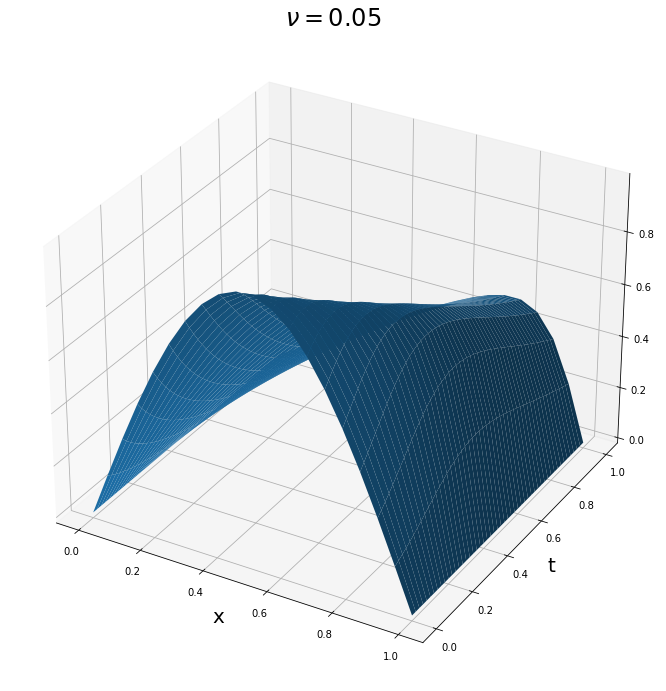

In [90]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=0.05,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 0.05$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

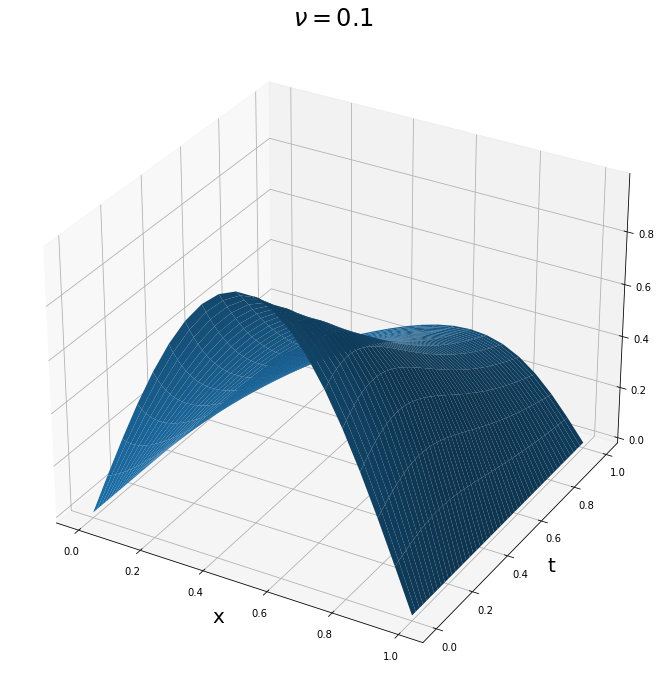

In [91]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=0.1,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 0.1$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

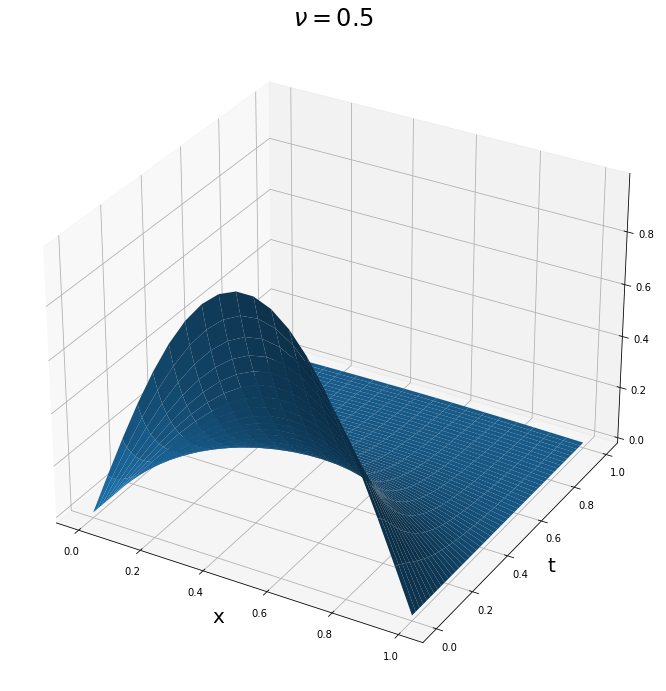

In [92]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=0.5,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 0.5$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

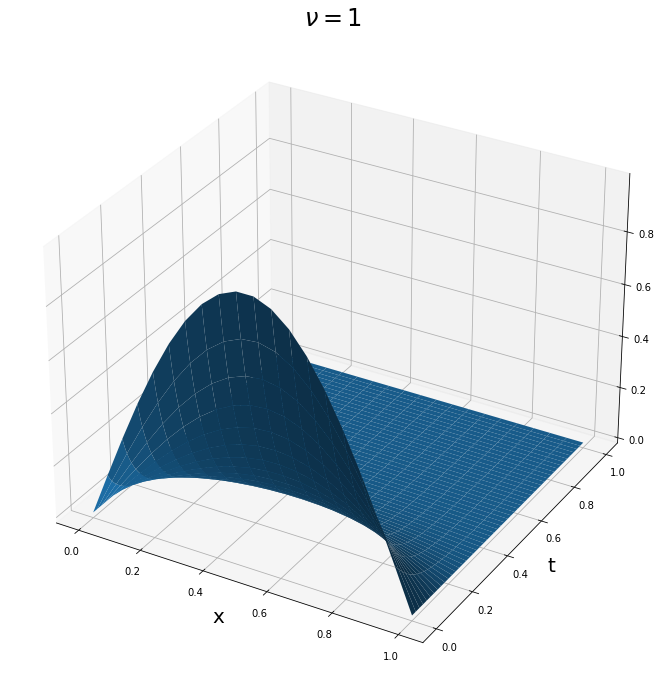

In [84]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 1$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

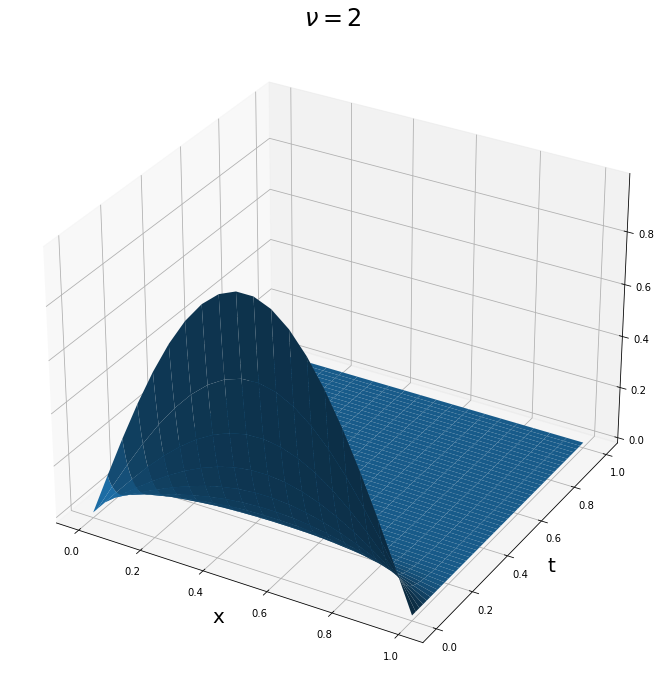

In [85]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=2,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 2$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

Text(0.5, 0, 't')

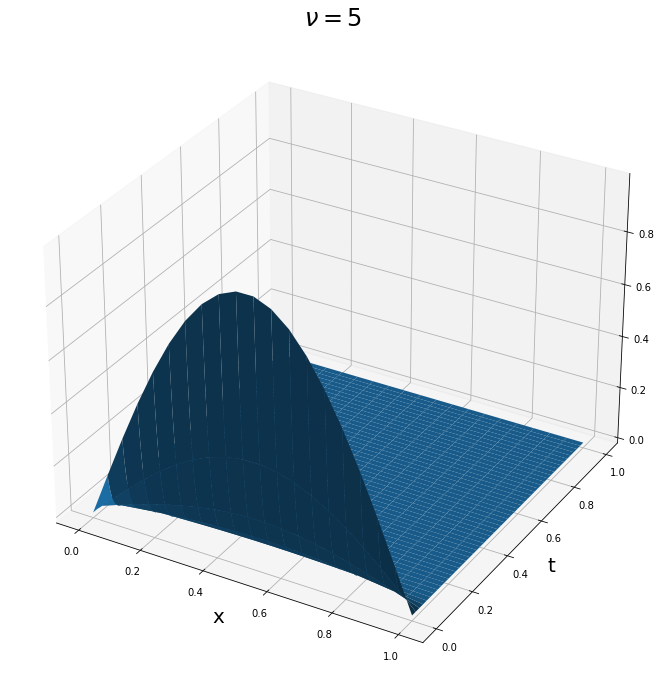

In [86]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=5,grid=grid,time=time,initial_conditions=initial)

fd.Plot_func(grid,time,u)
plt.pyplot.title(r'$\nu = 5$',fontsize=24)
plt.pyplot.xlabel('x',fontsize=20)
plt.pyplot.ylabel('t',fontsize=20)

# Higher Order Explicit Finite Difference Method

An easy way to increase the accuracy of our numerical solver is to use higher order expressions for the approximation of the derivatives. These expressions are given by:

\\[\frac{\partial u}{\partial x} \approx \frac{-u(x + 2\Delta x,t) + 8u(x + \Delta x,t) - 8u(x - \Delta x,t) + u(x - 2\Delta x,t)}{12\Delta x} = \frac{-u_{i+2,j} + 8u_{i+1,j} - 8u_{i-2,j} + u_{i-2,j}}{12\Delta x}\\]

\\[\frac{\partial^2 u}{\partial x^2} \approx \frac{-u(x + 2\Delta x,t) + 16u(x + \Delta x,t) - 30u(x,t) + 16u(x - \Delta x,t) - u(x - 2\Delta x,t)}{12\Delta x^2} = \frac{-u_{i+2,j} + 16u_{i+1,j} - 30u_{i,j} + 16u_{i-1,j} - u_{i-2,j}}{12\Delta x^2}\\]

This works great everywhere... except near the endpoints since we need data outside of the grid. To fix this, we must instead use the forward and backward difference formulas. The forward difference formulas are given by:

\\[\frac{\partial u}{\partial x} \approx \frac{-25u(x,t) + 48u(x + \Delta x,t) - 36u(x + 2\Delta x,t) + 16u(x + 3\Delta x,t) - 3u(x + 4\Delta x,t)}{12\Delta x} = \frac{-25u_{i,j} + 48u_{i+1,j} - 36u_{i+2,j} + 16u_{i+3,j} - 3u_{i+4,j}}{12\Delta x}\\]

\\[\frac{\partial^2 u}{\partial x^2} \approx \frac{45u(x,t) - 154u(x + \Delta x,t) + 314u(x + 2\Delta x,t) - 156u(x + 3\Delta x,t) + 61u(x + 4\Delta x,t) - 10u(x + 5\Delta x,t)}{12\Delta x^2} = \frac{45u_{i,j} - 154u_{i+1,j} + 314u_{i+2,j} - 156u_{i+3,j} + 61u_{i+4,j} - 10u_{i+5,j}}{12\Delta x^2}\\]

The backward difference formulas are similar.

Using the previous equations allows us to implement an algorithm with higher accuracy than the simple algorithm we began with. This should allow us to reduce the number or grid points and the number of time points (allowing the program to run faster) without losing accuracy.

### Analytic Solutions for the Viscid Burger's Equation
From Inan and Bahadir, a more complex numerical method was used to solve Burger's equation, though the analytic solutions provide a way to compare the with the numerical solutions obtained above. From Table 3, 

| x    | t    | $\nu=1.0$ | $\nu=.01$ |
|------|------|-----------|------------|
| 0.25 | 0.10 | 0.253638  | 0.566328   |
|      | 0.15 | 0.156601  | 0.512148   |
|      | 0.20 | 0.096442  | 0.466583   |
|      | 0.25 | 0.059218  | 0.427995   |
|      |      |           |            |
| 0.50 | 0.10 | 0.371577  | 0.947414   |
|      | 0.15 | 0.226824  | 0.900098   |
|      | 0.20 | 0.138473  | 0.848365   |
|      | 0.25 | 0.084538  | 0.796762   |
|      |      |           |            |
| 0.75 | 0.10 | 0.272582  | 0.860134   |
|      | 0.15 | 0.164369  | 0.922756   |
|      | 0.20 | 0.099435  | 0.961891   |
|      | 0.25 | 0.060347  | 0.974689   |

which is for the problem with the following initial condition and boundary conditions

\\[u(x,0) = \mbox{sin}(\pi x) \qquad u(0,t)=u(1,t)=0\\]

with the analytical solution being given by

\\[u(x,t) = 2 \pi \nu \frac{\sum_{n=1}^\infty a_n \mbox{exp}(-n^2 \pi^2 \nu t)n \mbox{sin}(n\pi x)}{a_0 + \sum_{n=1}^\infty a_n \mbox{exp}(-n^2 \pi^2 \nu t)\mbox{cos}(n \pi x)}\\]

where 

\\[\begin{align*} 
a_0 &= \int_0^1 \mbox{exp}\left(-(1-\mbox{cos}(\pi x) )/(2 \pi \nu)\right)dx  \\
a_n &= 2\int_0^1 \mbox{exp}\left(-(1-\mbox{cos}(\pi x) )/(2 \pi \nu)\right)\mbox{cos}(n \pi x)dx.
\end{align*}\\]

## Crank-Nicholson Time-Step

As we saw, the explicit finite different method is only stable when $\Delta t$ is small compared to $(\Delta x)^2$. To implement this, the Cole-Hopf transformation is applied. This says that there is a function $\phi(x,t)$ such that

$$u(x,t) = -2 \nu \frac{1}{\phi}\frac{\partial \phi}{\partial x}.$$

This then allows us to write 

$$\begin{align*}
\frac{\partial u}{\partial t} &= -2\nu \frac{\partial }{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial t}\right) \\
\frac{1}{2}\frac{\partial u^2}{\partial x} &= 2\nu^2 \frac{\partial}{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2 \\
\frac{\partial^2 u}{\partial x^2} &= 2\nu\frac{\partial}{\partial x}\left(\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2 - \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2}\right)
\end{align*}$$

meaning 

$$\begin{align*}-2\nu \frac{\partial }{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial t}\right) + 2\nu^2 \frac{\partial}{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2&=  2\nu^2\frac{\partial}{\partial x}\left(\left(\frac{1}{\phi}\frac{\partial \phi}{\partial x}\right)^2 - \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2}\right) \\
\Rightarrow  \frac{\partial }{\partial x}\left(\frac{1}{\phi}\frac{\partial \phi}{\partial t}\right) & = \nu\frac{\partial}{\partial x}\left( \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2}\right).\end{align*}$$

By integrating both sides, we then obtain

$$\frac{1}{\phi}\frac{\partial \phi}{\partial t}  = \nu \frac{1}{\phi}\frac{\partial^2 \phi}{\partial x^2} + g(t).$$

But for now we are only interested in problems with time-independent boundary conditions, so we set $g(t)=0$. After applying this transformation, it is now apparent that the problem reduces to the diffusion equation

$$\frac{\partial \phi}{\partial t}  = \nu \frac{\partial^2 \phi}{\partial x^2}.$$

If we begin by considering problems in which $u(0,t) = u(L,t) = 0$, we see that the boundary conditions on $phi$ require $\phi_x(0,t) = \phi_x(L,t) = 0$. Following Kadalbajoo and Awasthi, applying the Crank-Nicholson time-stepping method with Neumann boundary conditions leads to the following system of equations:

$$\begin{align*}
(1+\alpha)\phi_{0,j+1} -\alpha \phi_{1,j+1} &= \alpha \phi_{1,j} + (1-\alpha)\phi_{0,j} \\
-\frac{\alpha}{2}\phi_{i-1,j+1} + (1+\alpha)\phi_{i,j+1}-\frac{\alpha}{2}\phi_{i+1,j+1} &=
\frac{\alpha}{2}\phi_{i-1,j} + (1-\alpha)\phi_{i,j}+\frac{\alpha}{2}\phi_{i+1,j} \qquad \mbox{when }1 \leq i \leq M\\
-\alpha\phi_{M-1,j+1} + (1+\alpha)\phi_{M,j+1} &= \alpha \phi_{M-1,j}+(1-\alpha) \phi_{M,j}
\end{align*}$$

This system of equations can then be written using tridiagonal matrices.
$$\begin{pmatrix}
            1+\alpha          & -\alpha           & 0                & ...\\
            -\frac{\alpha}{2} & 1+\alpha          &-\frac{\alpha}{2} & ... \\
            \vdots            & \vdots            &   \vdots         & ... \\
            0                 & -\frac{\alpha}{2} & 1+\alpha         &-\frac{\alpha}{2} \\
            0                 & 0                 &-\alpha           & 1+\alpha \\
   \end{pmatrix}
   \begin{pmatrix}
   \phi_{0,j+1} \\
   \phi_{1,j+1} \\
   \vdots    \\
   \phi_{M-1,j+1}\\
   \phi_{M,j+1}\\
   \end{pmatrix}
   =
   \begin{pmatrix}
            1-\alpha          & \alpha            & 0                & ...\\
            \frac{\alpha}{2}  & 1-\alpha          &\frac{\alpha}{2}  & ... \\
            \vdots            & \vdots            &   \vdots         & ... \\
            0                 &  \frac{\alpha}{2} & 1-\alpha         & \frac{\alpha}{2} \\
            0                 & 0                 & \alpha           & 1-\alpha \\
   \end{pmatrix}
   \begin{pmatrix}
   \phi_{0,j} \\
   \phi_{1,j} \\
   \vdots    \\
   \phi_{M-1,j}\\
   \phi_{M,j}\\
   \end{pmatrix}
   $$

To solve this system of equations, the method outlined in section 20.4.1 of Landau, et al. is used. A function was written to generate the above tridiagonal matrices, and a tridiagonal matrix solver was written. Before using this in the PDE solver, a couple checks were run to ensure that the solver works correctly. 

In [4]:
import numpy.testing as test

alpha = 0.5

# cn.init_matrices()

# Comparison of the error of the different methods

To get an idea of the error of each of these methods, we've decided to compare each method at $t = 0.2$ for $\nu = 1$ because the function is relatively large there. Normally for error comparison of a PDE we would either like to look at the error at the final time or the error at a range of times. These are not practical here because of the nature of the problem. We can't look at the error at the final time because the function decays to 0 as time increases. This means that any numerical method will be close to the analytic solution there. Also, we've decided to compare the error at only one point in time because running the analytic solution with enough terms to ensure that level of accuracy takes too long. As a compromise we've decided to look at the solutions at $t = 0.2$ because the function is relatively large and because it has deviated substantially from the initial conditions by that point. 

We'll begin by looking at the error for the most basic numerical method with a grid of 20 positions and 10000 time points.

Text(0, 0.5, 'u(x,t = 0.2)')

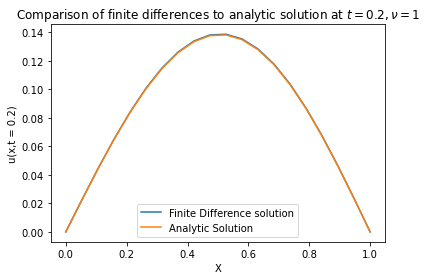

In [103]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 20, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,u[int(10000*0.2)],label="Finite Difference solution")
plt.pyplot.plot(grid,analytic_soln_2,label="Analytic Solution")
plt.pyplot.legend()
plt.pyplot.title(r"Comparison of finite differences to analytic solution at $t = 0.2, \nu = 1$")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

In the plot above, we can't really see what is going on because the numerical and analytic solutions are so close to each other (they lie on top of each other in the plot). Let's instead look at the magnitude of the difference.

Text(0, 0.5, 'u(x,t = 0.2)')

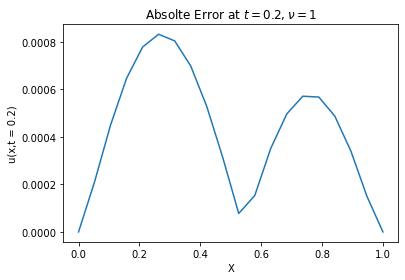

In [102]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

plt.pyplot.plot(grid,np.abs(u[int(10000*0.2)]-analytic_soln_2))
plt.pyplot.title(r'Absolte Error at $t = 0.2, \nu = 1$')
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

The plot above shows that the numerical solution is within 0.0005 of the analytic solution at all points for $t = 0$. That is equivalent to a relative error of only 0.36%. Let's see what happens when we increase the number of grid points in the numerical solution.

Text(0, 0.5, 'u(x,t = 0.2)')

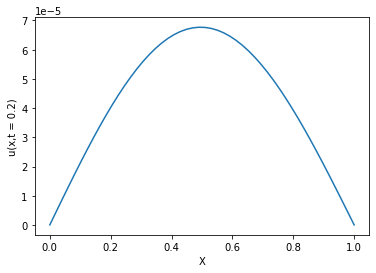

In [7]:
grid = np.linspace(0,1,50)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 20, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,np.abs(u[int(10000*0.2)]-analytic_soln_2))
#plt.pyplot.title("Comparison of finite differences to analytic solution at t = 0.2, nu = 1")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

The plot above shows that the error has decrease by a factor of about 5 when we increased the number of grid points from 20 to 50. Let's try this again but instead increase the number of time points.

Text(0, 0.5, 'u(x,t = 0.2)')

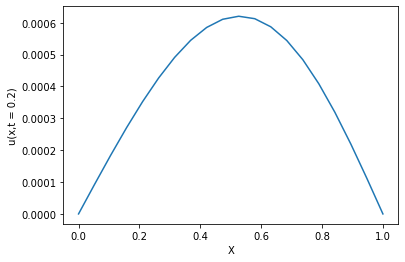

In [8]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,100000)

u = fd.FiniteElements_Burgers(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 20, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,np.abs(u[int(100000*0.2)]-analytic_soln_2))
#plt.pyplot.title("Comparison of finite differences to analytic solution at t = 0.2, nu = 1")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

Surprisingly, the scale of this plot is about the same as the original error. This means that we've maxed out the precision of this method for a grid of size 20. So, if we wanted to, we could increase both the number of grid points and the number of time points to get an more accurate approximation. 

Now, let's these results to the higher order method.

Text(0, 0.5, 'u(x,t = 0.2)')

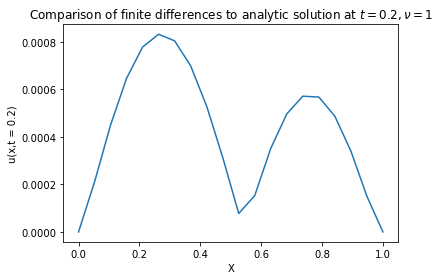

In [104]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers_Higher_Order(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 2, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,np.abs(u[int(10000*0.2)]-analytic_soln_2))
plt.pyplot.title(r"Comparison of finite differences to analytic solution at $t = 0.2, \nu = 1$")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

Text(0, 0.5, 'u(x,t = 0.2)')

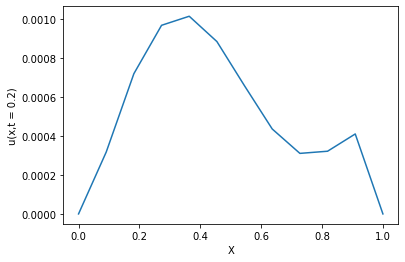

In [95]:
grid = np.linspace(0,1,12)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,10000)

u = fd.FiniteElements_Burgers_Higher_Order(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 20, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,np.abs(u[int(10000*0.2)]-analytic_soln_2))
#plt.pyplot.title("Comparison of finite differences to analytic solution at t = 0.2, nu = 1")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

Text(0, 0.5, 'u(x,t = 0.2)')

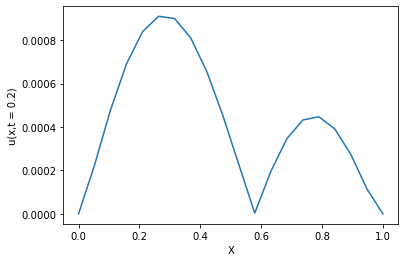

In [96]:
grid = np.linspace(0,1,20)
initial = np.sin(np.pi*grid)
time=np.linspace(0,1,100000)

u = fd.FiniteElements_Burgers_Higher_Order(nu=1,grid=grid,time=time,initial_conditions=initial)

analytic_soln_2 = analytic_sol.IB_analytic_sum(nu = 1, x = grid, t = [0.2], n_max = 20, problem = 1)
analytic_soln_2 = [i[0] for i in analytic_soln_2]

plt.pyplot.plot(grid,np.abs(u[int(100000*0.2)]-analytic_soln_2))
#plt.pyplot.title("Comparison of finite differences to analytic solution at t = 0.2, nu = 1")
plt.pyplot.xlabel("X")
plt.pyplot.ylabel("u(x,t = 0.2)")

### Maybe remove this later, or run simulation with this approximation instead and compare

The advection term can then be approximated using Taylor expansions of both $u^2(x+\Delta x,t)/2$ and $u^2(x-\Delta x,t)/2$ as shown

\\[\frac{u^2(x+\Delta x,t)}{2} = \frac{u^2}{2} + \frac{2u}{2}\frac{\partial u}{\partial x}\Delta x+...=\frac{u^2}{2} + u\frac{\partial u}{\partial x}\Delta x+...\\]

\\[\frac{u^2(x-\Delta x,t)}{2} = \frac{u^2}{2} - \frac{2u}{2}\frac{\partial u}{\partial x}\Delta x+...=\frac{u^2}{2} - u\frac{\partial u}{\partial x}\Delta x+..\\]

Thus

\\[\begin{align*}
\frac{u^2(x+\Delta x,t)}{2} - \frac{u^2(x-\Delta x,t)}{2} &\approx \left(\frac{u^2}{2} + u\frac{\partial u}{\partial x}\Delta x\right) - \left(\frac{u^2}{2} - u\frac{\partial u}{\partial x}\Delta x\right) \\
&= 2 u \frac{\partial u}{\partial x}\Delta x
\end{align*} \\]

meaning that
\\[u \frac{\partial u}{\partial x} \approx \frac{1}{2\Delta x}\left(\frac{u^2(x+\Delta x,t)}{2} - \frac{u^2(x-\Delta x,t)}{2}\right) = \frac{1}{4}\left(\frac{u_{i+1,j}^2 - u_{i-1,j}^2}{\Delta x}\right).\\]

### References

1. Inan, Bilge, and Ahmet Refik Bahadir. “Numerical Solution of the One-Dimensional Burgers’ Equation: Implicit and Fully Implicit Exponential Finite Difference Methods.” Pramana, vol. 81, no. 4, 2013, pp. 547–556., doi:10.1007/s12043-013-0599-z. 

2. Kadalbajoo, Mohan. K., and A. Awasthi. “A Numerical Method Based on Crank-Nicolson Scheme for Burgers’ Equation.” Applied Mathematics and Computation, vol. 182, no. 2, 2006, pp. 1430–1442., doi:10.1016/j.amc.2006.05.030. 

3. Landau, Rubin H., et al. Computational Physics: Problem Solving with Python. Wiley-VCH, 2015. 